预测Titanic乘客逃生

In [0]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from patsy import dmatrices # 可根据离散变量自动生成哑变量
from sklearn.linear_model import LogisticRegression # sk-learn库Logistic Regression模型
from sklearn.model_selection import train_test_split, cross_val_score # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\chongyue\\Data Science\\Dropbox\\9Z Machine learning\\Logistic Regression'

> 从../input/train.csv读入数据

In [0]:

data=pd.read_csv("./titanic/train.csv")


删除不需要的列以及含有NA值的行

In [0]:
data = data.drop(['Ticket', 'Cabin'], axis = 1)
data = data.dropna()

In [0]:
len(data.index)

712

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


观察逃生人数与未逃生人数

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

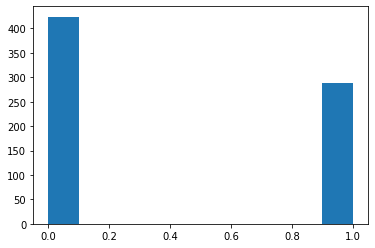

In [0]:
plt.hist(data.Survived)

观察女性逃生人数
观察男性逃生人数

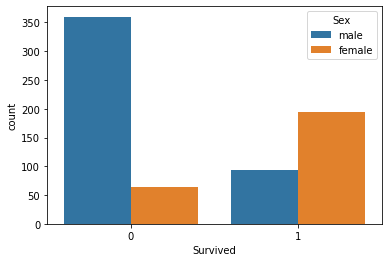

In [0]:
sns.countplot(x='Survived',hue='Sex' ,data=data)

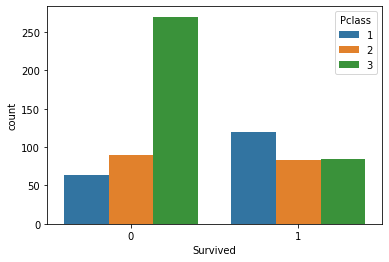

In [0]:
sns.countplot(x='Survived', hue='Pclass', data=data)

观察非低等舱逃生情况

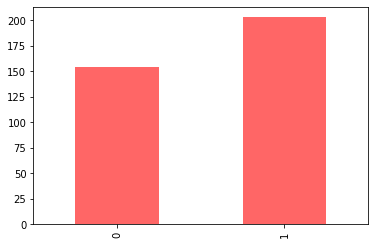

In [0]:
highclass = data.Survived[data.Pclass != 3].value_counts().sort_index()
highclass.plot(kind='bar',label='Highclass', color='red', alpha=0.6)
plt.show()

观察低等舱逃生情况

<function matplotlib.pyplot.show(*args, **kw)>

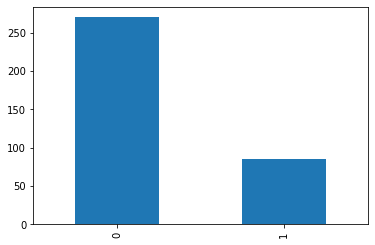

In [0]:
lowclass=data.Survived[data.Pclass==3].value_counts()
lowclass.plot(kind='bar')
plt.show

dmatrices将数据中的离散变量变成哑变量，并指明用Pclass, Sex, Embarked来预测Survived

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
y,X= dmatrices('Survived~Pclass+C(Sex)+Age+C(Embarked)', data,return_type='dataframe')
X.head(5)


,Intercept,C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Pclass,Age
0,1.0,1.0,0.0,1.0,3.0,22.0
1,1.0,0.0,0.0,0.0,1.0,38.0
2,1.0,0.0,0.0,1.0,3.0,26.0
3,1.0,0.0,0.0,1.0,1.0,35.0
4,1.0,1.0,0.0,1.0,3.0,35.0


In [0]:
model=LogisticRegression(C=0.1)

In [0]:
model.fit(X,y)

D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

输出训练准确率

In [0]:
model.score(X,y)

0.800561797752809

输出空模型的正确率：空模型预测所有人都未逃生

In [0]:
died=y[y.Survived==0]
die_rate=died.shape[0]/y.shape[0]
print(die_rate)


0.5955056179775281


观察模型系数，即每种因素对于预测逃生的重要性

In [0]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[9.880870862499552e-05]
1,C(Sex)[T.male],[-1.7845535569128674]
2,C(Embarked)[T.Q],[-0.17566026956505545]
3,C(Embarked)[T.S],[-0.28081476520155]
4,Pclass,[-1.0041288896211933]
5,Age,[-0.031707500680120196]


对测试数据../input/test.csv生成预测，将结果写入./my_prediction.csv

画Precision-Recall Curve

precision= TP/(TP+FP)
Recall = TP/(TP+FN)

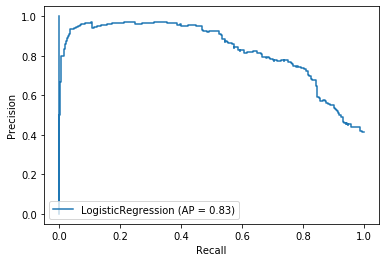

In [0]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X,y)